# Steps of this classification  Model
 **Building A data pipeline**

 **Preprocessing Images for DL**

 **Creating A Deep NN Classifier**

 **Evaluating Model Performance**
 
 **Saving the model for deployment**


# 1 set up and load data

## 1.1 install dependencies and set up

In [1]:
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [2]:
!pip list

Package                      Version
---------------------------- --------
absl-py                      2.1.0
aiohttp                      3.9.3
aiosignal                    1.2.0
appnope                      0.1.2
asttokens                    2.0.5
astunparse                   1.6.3
attrs                        23.1.0
blinker                      1.6.2
Brotli                       1.0.9
cachetools                   5.3.3
certifi                      2024.2.2
cffi                         1.16.0
charset-normalizer           2.0.4
click                        8.1.7
comm                         0.2.1
contourpy                    1.2.1
cryptography                 41.0.3
cycler                       0.12.1
debugpy                      1.6.7
decorator                    5.1.1
executing                    0.8.3
flatbuffers                  24.3.25
fonttools                    4.51.0
frozenlist                   1.4.0
gast                         0.4.0
google-auth                  2.6.0
googl

In [3]:
import tensorflow as tf
import os

In [4]:
#Avoid OOM errors by setting GPU memory consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## 1.2 Remove dodgy Images

In [5]:
import cv2
import imghdr

/var/folders/yn/jzzqv3s17t5_glr9g2gqxmyh0000gn/T/ipykernel_2249/4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:
data_dir = '/Users/sadiakhanrupa/Bootcamp Main Phase/dataset_final_project/image_classification_plants'

In [7]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [8]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [9]:
os.listdir(data_dir)

['disease', 'no_disease']

In [10]:
for image_class in os.listdir(data_dir):
    print(image_class)

disease
no_disease


In [11]:
os.listdir(os.path.join(data_dir, "disease"))

['images26.jpg',
 'images137.jpg',
 'prevent_houseplant_diseases_effectively.jpg',
 'images136.jpg',
 'images122.jpg',
 'images27.jpg',
 'image18.jpeg',
 '5168-aphids.jpg',
 'how-to-grow-a-healthy-indoor-garden-og.jpg',
 'images134.jpg',
 'images120.jpg',
 'image43.jpeg',
 'ScalesCloseup.jpg',
 'images30.jpg',
 'image14.jpeg',
 'sick-houseplant-brown-spots-yellowed-leaves-selective-focus-indoor-plant-diseases-180055151.jpg',
 'images20.jpg',
 'houseplants_scale_on_schefflera_johnson.jpg',
 'images119.jpg',
 'Fotolia_70897371_Subscription_Monthly_M-252442.jpg',
 'images130.jpg',
 'images118.jpg',
 'insects.jpg',
 'plant-problems-disease-720x500.jpg',
 'images23.jpg',
 'images126.jpg',
 'images132.jpg',
 'mqpUodGkSPXdrWzvHmNiqL-1200-80.jpg',
 'images133.jpg',
 'Mildew_480x480.jpg',
 '1000_F_470333137_LBZBO5S2fipRxnqZ6W0qtRvy9wMw4C8h.jpg',
 'images92.jpg',
 'images45.jpg',
 'images51.jpg',
 'images154.jpg',
 'images6.jpg',
 'plant-beaucarnea-recurvata-nolina-leaves-have-brown-spots-dry-le

In [12]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        print(image)

images26.jpg
images137.jpg
prevent_houseplant_diseases_effectively.jpg
images136.jpg
images122.jpg
images27.jpg
image18.jpeg
5168-aphids.jpg
how-to-grow-a-healthy-indoor-garden-og.jpg
images134.jpg
images120.jpg
image43.jpeg
ScalesCloseup.jpg
images30.jpg
image14.jpeg
sick-houseplant-brown-spots-yellowed-leaves-selective-focus-indoor-plant-diseases-180055151.jpg
images20.jpg
houseplants_scale_on_schefflera_johnson.jpg
images119.jpg
Fotolia_70897371_Subscription_Monthly_M-252442.jpg
images130.jpg
images118.jpg
insects.jpg
plant-problems-disease-720x500.jpg
images23.jpg
images126.jpg
images132.jpg
mqpUodGkSPXdrWzvHmNiqL-1200-80.jpg
images133.jpg
Mildew_480x480.jpg
1000_F_470333137_LBZBO5S2fipRxnqZ6W0qtRvy9wMw4C8h.jpg
images92.jpg
images45.jpg
images51.jpg
images154.jpg
images6.jpg
plant-beaucarnea-recurvata-nolina-leaves-have-brown-spots-dry-leaf-262996213.jpg
les-principales-maladies-des-plantes-626545.png
images7.jpg
images155.jpg
hgic_houseplant_crown_rot_on_Aloe_due_to_overwatering-H

In [13]:
#to remove .DS_Store
''' 
for item in os.listdir(data_dir):
    # Construct the full path of the item
    item_path = os.path.join(data_dir, item)
    
    # Check if the item is a file and if its name is .DS_Store
    if os.path.isfile(item_path) and item == ".DS_Store":
        # Remove the file
        os.remove(item_path)
'''

' \nfor item in os.listdir(data_dir):\n    # Construct the full path of the item\n    item_path = os.path.join(data_dir, item)\n    \n    # Check if the item is a file and if its name is .DS_Store\n    if os.path.isfile(item_path) and item == ".DS_Store":\n        # Remove the file\n        os.remove(item_path)\n'

In [14]:
img = cv2.imread(os.path.join(data_dir, 'disease','images26.jpg' ))

In [15]:
type(img)

numpy.ndarray

In [16]:
img.shape

(168, 299, 3)

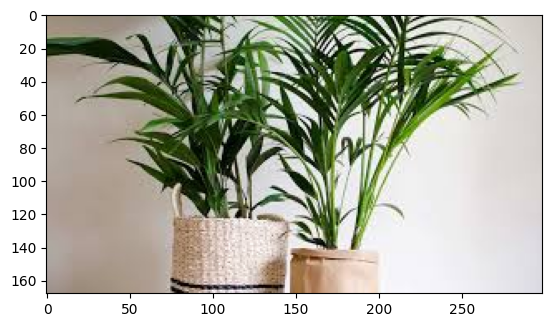

In [17]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [18]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image{}'.format(image_path))


## 1.3 Load Data

In [19]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [20]:
import numpy as np

In [21]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 415 files belonging to 2 classes.


In [22]:
data_iterator = data.as_numpy_iterator()

In [23]:
#get another batch from itearator
batch = data_iterator.next()

In [24]:
#images representes as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [25]:

batch[1]

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0], dtype=int32)

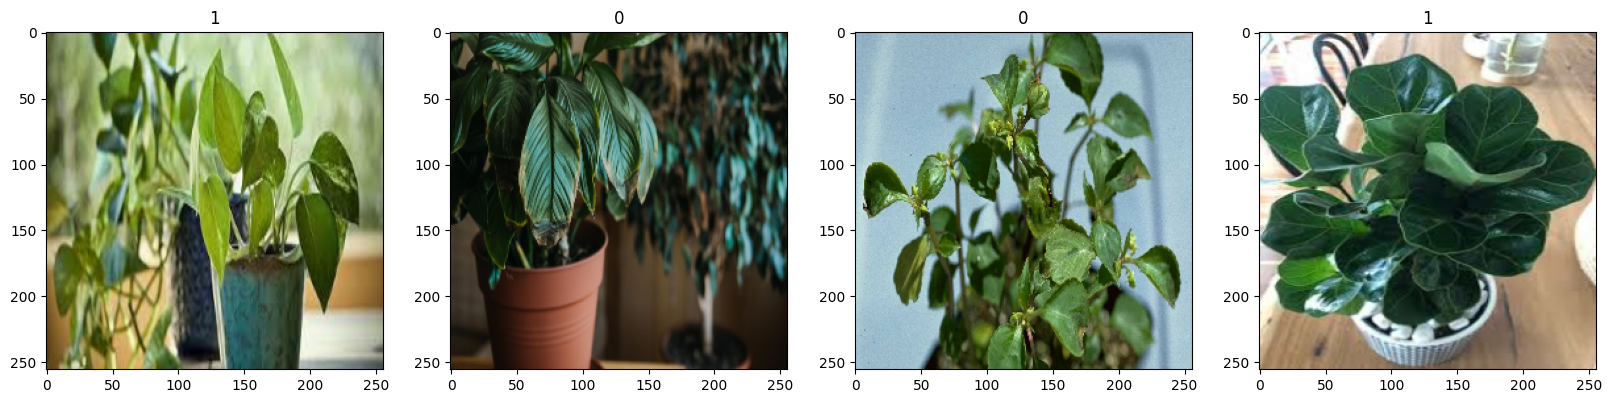

In [26]:
# 0 = disease
# 1 = no disease
fig, ax = plt.subplots(ncols=4, figsize= (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2 Preprocess Data

In [27]:
scaled = batch[0]/255

In [28]:
scaled.min()

0.0

In [29]:
scaled.max()

1.0

## 2.1 Scale Data

In [30]:
data = data.map(lambda x,y: (x/255, y))

In [31]:
scaled_iterator = data.as_numpy_iterator()

In [32]:
batch = scaled_iterator.next()

In [33]:
batch[0].max()

1.0

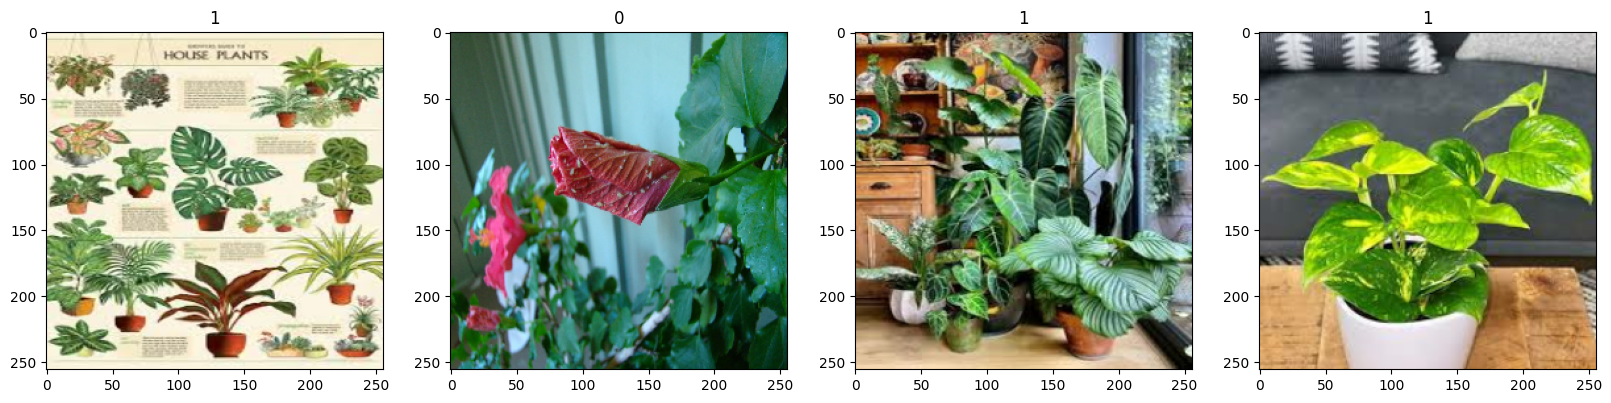

In [34]:
# 0 = disease
# 1 = no disease
fig, ax = plt.subplots(ncols=4, figsize= (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## 2.2 Split data

In [35]:
len(data)

13

In [36]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [37]:
print(train_size)
print(val_size)
print(test_size)

9
2
2


In [38]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 3. Deep Model

## 3.1 Build Deep Learning Model

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [40]:
model = Sequential()

In [41]:
MaxPooling2D??

Init signature:
MaxPooling2D(
    pool_size=(2, 2),
    strides=None,
    padding='valid',
    data_format=None,
    name=None,
    **kwargs,
)
Source:        
@keras_export(["keras.layers.MaxPooling2D", "keras.layers.MaxPool2D"])
class MaxPooling2D(BasePooling):
    """Max pooling operation for 2D spatial data.

    Downsamples the input along its spatial dimensions (height and width)
    by taking the maximum value over an input window
    (of size defined by `pool_size`) for each channel of the input.
    The window is shifted by `strides` along each dimension.

    The resulting output when using the `"valid"` padding option has a spatial
    shape (number of rows or columns) of:
    `output_shape = math.floor((input_shape - pool_size) / strides) + 1`
    (when `input_shape >= pool_size`)

    The resulting output shape when using the `"same"` padding option is:
    `output_shape = math.floor((input_shape - 1) / strides) + 1`

    Args:
        pool_size: int or tuple of 2 integers

In [42]:

model.add(Conv2D(16,(3,3),1, activation= 'relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation= 'relu'))
model.add(ç())

model.add(Conv2D(16,(3,3), 1, activation= 'relu'))
model.add(MaxPooling2D())

model.add(ç())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


/Users/sadiakhanrupa/anaconda3/envs/tf/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
Dense??

Init signature:
Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    lora_rank=None,
    **kwargs,
)
Source:        
@keras_export("keras.layers.Dense")
class Dense(Layer):
    """Just your regular densely-connected NN layer.

    `Dense` implements the operation:
    `output = activation(dot(input, kernel) + bias)`
    where `activation` is the element-wise activation function
    passed as the `activation` argument, `kernel` is a weights matrix
    created by the layer, and `bias` is a bias vector created by the layer
    (only applicable if `use_bias` is `True`).

    Note: If the input to the layer has a rank greater than 2, `Dense`
    computes the dot product between the `inputs` and the `kernel` along the
    last axis of the `inputs` and axis 0 of the `kernel` 

In [43]:
model.compile('adam', loss= tf.losses.BinaryCrossentropy(), metrics= ['accuracy'])

In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## 3.2 Train

In [53]:
logdir = 'logs'

In [57]:
from tensorflow.keras.callbacks import TensorBoard

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= logdir)

In [58]:
hist = model.fit(train, epochs= 20, validation_data= val, callbacks=[tensorboard_callback])

Epoch 1/20


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.5729 - loss: 1.0837 - val_accuracy: 0.6562 - val_loss: 0.6828
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.6809 - loss: 0.6460 - val_accuracy: 0.5000 - val_loss: 0.6947
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.6190 - loss: 0.6687 - val_accuracy: 0.7031 - val_loss: 0.5788
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.6899 - loss: 0.6131 - val_accuracy: 0.6094 - val_loss: 0.6466
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.6572 - loss: 0.6441 - val_accuracy: 0.6094 - val_loss: 0.6687
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.7485 - loss: 0.6444 - val_accuracy: 0.6250 - val_loss: 0.6038
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.7006 - loss: 0.5676 - val_accuracy: 0.7500 - val_loss: 0.4843
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.7149 - loss: 0.5066 - val_accuracy: 0.7812 - val_loss: 0.4938
Epo

## 3.3 Plot Performance

In [59]:
hist.history

{'accuracy': [0.4895833432674408,
  0.6770833134651184,
  0.6493055820465088,
  0.6736111044883728,
  0.6180555820465088,
  0.7118055820465088,
  0.7048611044883728,
  0.7430555820465088,
  0.8368055820465088,
  0.8715277910232544,
  0.8715277910232544,
  0.9236111044883728,
  0.9652777910232544,
  0.9652777910232544,
  0.9652777910232544,
  0.9618055820465088,
  0.9756944179534912,
  0.9652777910232544,
  0.96875,
  0.9722222089767456],
 'loss': [0.9460160732269287,
  0.6316680908203125,
  0.6608827114105225,
  0.6411879658699036,
  0.6696972846984863,
  0.6373456120491028,
  0.5679938793182373,
  0.5074660181999207,
  0.4202984571456909,
  0.34917980432510376,
  0.30729758739471436,
  0.23679834604263306,
  0.13983634114265442,
  0.11974132061004639,
  0.11524447053670883,
  0.11760696768760681,
  0.10073810070753098,
  0.07587423920631409,
  0.07690032571554184,
  0.0891130268573761],
 'val_accuracy': [0.65625,
  0.5,
  0.703125,
  0.609375,
  0.609375,
  0.625,
  0.75,
  0.78125,
 

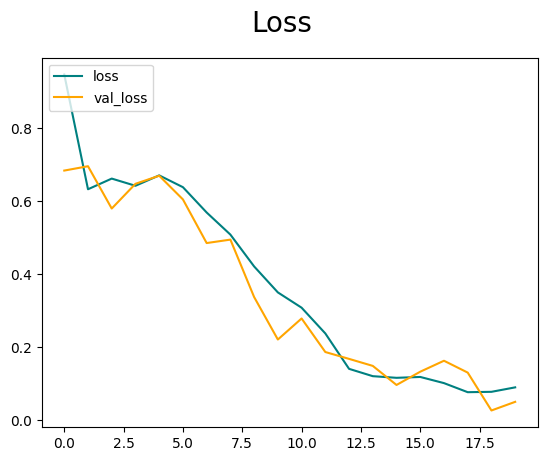

In [62]:
fig = plt.figure()
plt.plot(hist.history['loss'],color= 'teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize= 20)
plt.legend(loc='upper left')
plt.show()

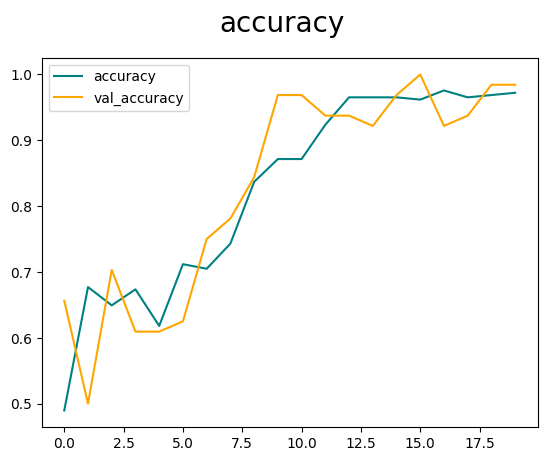

In [63]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color= 'teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize= 20)
plt.legend(loc='upper left')
plt.show()

# 4 Evaluate Performance

## 4.1 Evaluate

In [64]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [65]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [66]:
len(test)

2

In [67]:
for batch in test.as_numpy_iterator():
    X,y = batch
    y_pred = model.predict(X)
    pre.update_state(y,y_pred)
    re.update_state(y,y_pred)
    acc.update_state(y,y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


2024-05-06 15:57:24.597691: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [68]:
print('Precision', pre.result().numpy())

Precision 0.9722222


In [69]:
print('Recall', re.result().numpy())

Recall 1.0


In [70]:
print('Accuray', acc.result().numpy())

Accuray 0.984127


## 4.2 Test

In [71]:
import cv2

#### disease test

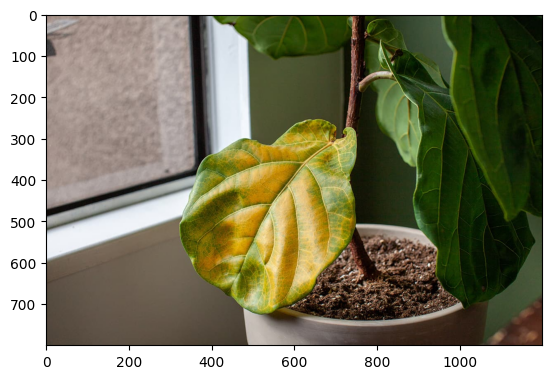

In [73]:
img = cv2.imread('/Users/sadiakhanrupa/Bootcamp Main Phase/dataset_final_project/image_classification_plants/disease_test.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

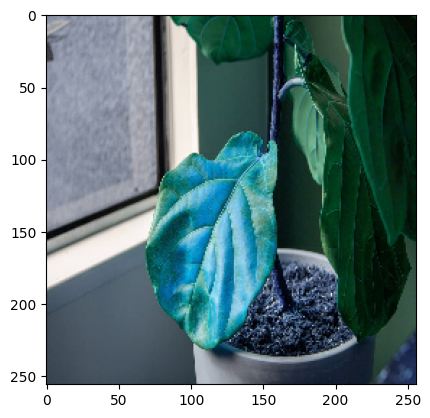

In [77]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [78]:
np.expand_dims(resize, 0)

array([[[[133.6875   , 140.6875   , 160.6875   ],
         [130.9082   , 137.9082   , 157.9082   ],
         [126.95117  , 133.95117  , 153.95117  ],
         ...,
         [ 31.167969 ,  62.21289  ,  41.69922  ],
         [ 11.693359 ,  36.69336  ,  16.69336  ],
         [  2.4277344,  18.34375  ,   7.8027344]],

        [[133.       , 140.       , 160.       ],
         [129.38086  , 136.38086  , 156.38086  ],
         [127.666016 , 134.66602  , 154.66602  ],
         ...,
         [ 12.498047 ,  38.560547 ,  18.748047 ],
         [ 31.107422 ,  56.10742  ,  36.10742  ],
         [ 21.875    ,  42.0625   ,  28.6875   ]],

        [[131.95117  , 138.95117  , 158.95117  ],
         [130.83203  , 137.83203  , 157.83203  ],
         [132.10547  , 139.10547  , 159.10547  ],
         ...,
         [  7.5429688,  25.605469 ,   7.2304688],
         [ 17.980469 ,  38.751953 ,  20.230469 ],
         [ 28.       ,  52.3125   ,  33.6875   ]],

        ...,

        [[ 58.       ,  68.       ,  7

In [80]:
y_prediction = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [82]:
y_prediction
# 0 = disease
# 1 = no disease

array([[0.0031699]], dtype=float32)

In [83]:
if y_prediction >.5:
    print('Predicted class has no disease')
else:
    print('Predicted class has disease')

Predicted class has disease


### no disease test

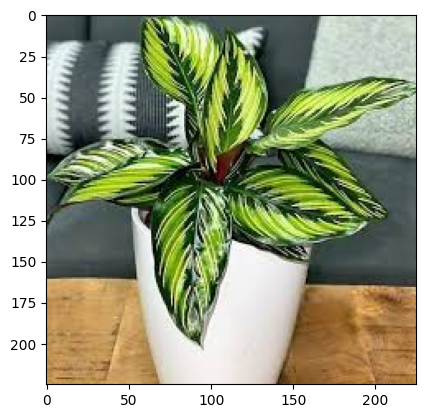

In [84]:
img1 = cv2.imread('/Users/sadiakhanrupa/Bootcamp Main Phase/dataset_final_project/image_classification_plants/no_disease_test.jpeg')
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
plt.show()

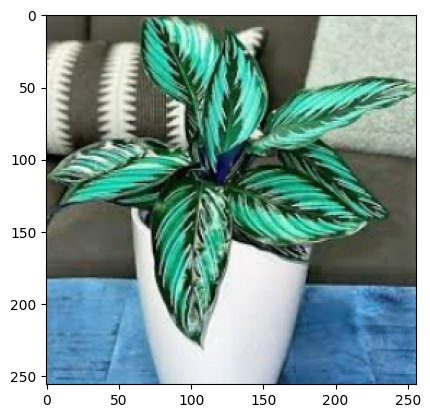

In [86]:
resize1 = tf.image.resize(img1,(256,256))
plt.imshow(resize1.numpy().astype(int))
plt.show()

In [88]:
y_prediction = model.predict(np.expand_dims(resize1/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [90]:
y_prediction

array([[0.9974515]], dtype=float32)

In [89]:
if y_prediction >.5:
    print('Predicted class has no disease')
else:
    print('Predicted class has disease')

Predicted class has no disease


# 5.Save the model

In [92]:
from tensorflow.keras.models import load_model

In [95]:
model.save(os.path.join('models','disease_or_no_disease_indoor_plants.h5'))

In [101]:
new_model = load_model(os.path.join('models','disease_or_no_disease_indoor_plants.h5'))

In [103]:
y_prediction = new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [105]:
y_prediction

array([[0.9974515]], dtype=float32)

In [104]:
if y_prediction >.5:
    print('Predicted class has no disease')
else:
    print('Predicted class has disease')

Predicted class has no disease
